In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 50

In [2]:
df= pd.read_csv('Data/Data_Marketing_Customer_Analysis_Round3.csv')

In [3]:
df.drop(["Unnamed: 0"], axis=1,inplace=True)

In [4]:
numerical = df.select_dtypes(int)

In [5]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [6]:
categoricals = df.select_dtypes(object)


## Activity 6

### One Hot/Label Encoding of the categorical variables in the categoricals data frame

In [7]:
categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   region             10689 non-null  object
 1   response           10689 non-null  object
 2   coverage           10689 non-null  object
 3   education          10689 non-null  object
 4   effective_to_date  10689 non-null  object
 5   month              10689 non-null  object
 6   employment_status  10689 non-null  object
 7   gender             10689 non-null  object
 8   location_code      10689 non-null  object
 9   marital_status     10689 non-null  object
 10  policy_type        10689 non-null  object
 11  policy             10689 non-null  object
 12  renew_offer_type   10689 non-null  object
 13  sales_channel      10689 non-null  object
 14  vehicle_class      10689 non-null  object
 15  vehicle_size       10689 non-null  object
dtypes: object(16)
memory usage: 1.3+ MB


I am goind to delete "effective_to_date" because it doesn't make sense to make dummies from every date. In addition we already have a "Month" column.

In [8]:
categoricals.drop(["effective_to_date"],axis=1,inplace=True)

/home/dani/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [9]:
categoricals

,region,response,coverage,education,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,central,no,premium,bachelor,jan,unemployed,f,suburban,married,personal auto,personal l1,offer3,web,luxury car,medsize
10685,north west,no,basic,college,jan,employed,f,urban,married,personal auto,personal l3,offer2,branch,four-door car,medsize
10686,central,no,extended,bachelor,feb,employed,f,rural,married,corporate auto,corporate l3,offer1,web,luxury suv,medsize
10687,west region,no,premium,college,feb,employed,f,urban,divorced,personal auto,personal l1,offer1,branch,suv,medsize


#### Which one are ordinals? 
As we have some columns with an order, we want to change it manually

In [10]:
categoricals.coverage.unique()

array(['basic', 'extended', 'premium'], dtype=object)

In [11]:
categoricals["coverage"]  = categoricals["coverage"].replace({'basic': '0', 'extended': '1', 'premium': '2'})

<ipython-input-11-e1d9039445fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals["coverage"]  = categoricals["coverage"].replace({'basic': '0', 'extended': '1', 'premium': '2'})


In [12]:
categoricals.education.unique()

array(['college', 'bachelor', 'high school or below', 'doctor', 'master'],
      dtype=object)

In [13]:
categoricals["education"]  = categoricals["education"].replace({'high school or below': '0', 'college': '1', 'bachelor': '2', 'master': '3', 'doctor': '4'})

<ipython-input-13-b3e6e3c73703>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals["education"]  = categoricals["education"].replace({'high school or below': '0', 'college': '1', 'bachelor': '2', 'master': '3', 'doctor': '4'})


In [14]:
categoricals.month.unique()

array(['feb', 'jan'], dtype=object)

In [15]:
categoricals["month"]  = categoricals["month"].replace({'jan': '0', 'feb': '1'})

<ipython-input-15-817c78909473>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals["month"]  = categoricals["month"].replace({'jan': '0', 'feb': '1'})


In [16]:
categoricals.vehicle_size.unique()

array(['medsize', 'small', 'large'], dtype=object)

In [17]:
categoricals["vehicle_size"]  = categoricals["vehicle_size"].replace({'small': '0', 'medsize': '1','large': '2' })

<ipython-input-17-8b0165ea3450>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categoricals["vehicle_size"]  = categoricals["vehicle_size"].replace({'small': '0', 'medsize': '1','large': '2' })


In [18]:
categoricals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10689 entries, 0 to 10688
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   region             10689 non-null  object
 1   response           10689 non-null  object
 2   coverage           10689 non-null  object
 3   education          10689 non-null  object
 4   month              10689 non-null  object
 5   employment_status  10689 non-null  object
 6   gender             10689 non-null  object
 7   location_code      10689 non-null  object
 8   marital_status     10689 non-null  object
 9   policy_type        10689 non-null  object
 10  policy             10689 non-null  object
 11  renew_offer_type   10689 non-null  object
 12  sales_channel      10689 non-null  object
 13  vehicle_class      10689 non-null  object
 14  vehicle_size       10689 non-null  object
dtypes: object(15)
memory usage: 1.2+ MB


#### Which one are nominals? 

In [19]:
categoricals.policy.unique()

array(['corporate l3', 'personal l3', 'personal l2', 'corporate l2',
       'personal l1', 'special l1', 'corporate l1', 'special l3',
       'special l2'], dtype=object)

In [20]:
categoricals.policy = categoricals.policy.apply(lambda x: 'corporate' if 'corporate' in x else x)
categoricals.policy

/home/dani/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0          corporate
1        personal l3
2        personal l3
3          corporate
4        personal l2
            ...     
10684    personal l1
10685    personal l3
10686      corporate
10687    personal l1
10688    personal l1
Name: policy, Length: 10689, dtype: object

In [21]:
categoricals.policy = categoricals.policy.apply(lambda x: 'personal' if 'personal' in x else x)
categoricals.policy

0        corporate
1         personal
2         personal
3        corporate
4         personal
           ...    
10684     personal
10685     personal
10686    corporate
10687     personal
10688     personal
Name: policy, Length: 10689, dtype: object

In [22]:
categoricals.policy = categoricals.policy.apply(lambda x: 'special' if 'special' in x else x)
categoricals.policy

0        corporate
1         personal
2         personal
3        corporate
4         personal
           ...    
10684     personal
10685     personal
10686    corporate
10687     personal
10688     personal
Name: policy, Length: 10689, dtype: object

In [23]:
#We can group corporate, personal and special

In [24]:
categoricals.policy.value_counts()

personal     7937
corporate    2312
special       440
Name: policy, dtype: int64

In [25]:
categoricals.vehicle_class.unique()

array(['four-door car', 'suv', 'two-door car', 'sports car', 'luxury car',
       'luxury suv'], dtype=object)

In [26]:
#We can also group luxury car and luxury suv, we don't want so much features

In [27]:
categoricals.vehicle_class = categoricals.vehicle_class.apply(lambda x: 'luxury' if 'luxury' in x else x)
categoricals.vehicle_class.unique()

array(['four-door car', 'suv', 'two-door car', 'sports car', 'luxury'],
      dtype=object)

In [28]:
categoricals.drop(["policy_type"],axis=1,inplace=True)

/home/dani/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Just use get dummies, as we don't need an order

In [29]:
categoricals = pd.get_dummies(data=categoricals, columns=['region', 'response','employment_status','gender','location_code','marital_status','policy','renew_offer_type','sales_channel','vehicle_class'], drop_first=True)

In [30]:
categoricals.columns

Index(['coverage', 'education', 'month', 'vehicle_size', 'region_east',
       'region_north west', 'region_west region', 'response_yes',
       'employment_status_employed', 'employment_status_medical leave',
       'employment_status_retired', 'employment_status_unemployed', 'gender_m',
       'location_code_suburban', 'location_code_urban',
       'marital_status_married', 'marital_status_single', 'policy_personal',
       'policy_special', 'renew_offer_type_offer2', 'renew_offer_type_offer3',
       'renew_offer_type_offer4', 'sales_channel_branch',
       'sales_channel_call center', 'sales_channel_web',
       'vehicle_class_luxury', 'vehicle_class_sports car', 'vehicle_class_suv',
       'vehicle_class_two-door car'],
      dtype='object')

### check if there are highly correlated features and drop them if there are any.

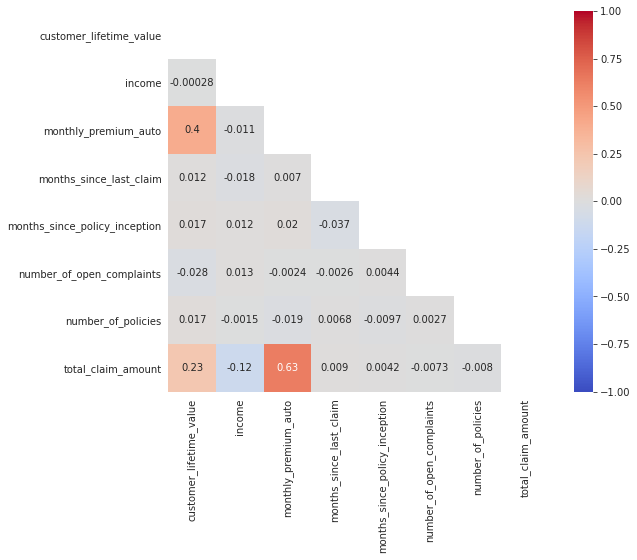

In [31]:
corr = numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

### X-y split (y is the target variable which is the total claim amount)

In [32]:
numerical

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,26794,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,15,31,1,7,707
...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214
10685,5259,61146,65,7,68,0,6,273
10686,23893,39837,201,11,63,0,2,381
10687,11971,64195,158,0,27,4,6,618


In [33]:
categoricals

,coverage,education,month,vehicle_size,region_east,region_north west,region_west region,response_yes,employment_status_employed,employment_status_medical leave,...,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,0,1,1,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0,1,0,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,2,1,1,1,0,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,1,1,0,1,0,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,0
4,2,2,0,1,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,2,2,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
10685,0,1,0,1,0,1,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0
10686,1,2,1,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0
10687,2,1,1,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0


In [34]:
df = pd.concat([numerical, categoricals], axis=1)
df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,coverage,education,...,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
0,4809,48029,61,7,52,0,9,292,0,1,...,0,1,0,0,0,0,0,0,0,0
1,2228,26794,64,3,26,0,1,744,0,1,...,0,0,1,0,1,0,0,0,0,0
2,14947,22139,100,34,31,0,2,480,0,2,...,0,1,0,0,1,0,0,0,1,0
3,22332,49078,97,10,3,0,2,484,1,1,...,1,0,0,1,0,0,0,0,0,0
4,9025,23675,117,15,31,1,7,707,2,2,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,15563,64811,253,8,40,2,7,1214,2,2,...,0,1,0,0,0,1,1,0,0,0
10685,5259,61146,65,7,68,0,6,273,0,1,...,1,0,0,1,0,0,0,0,0,0
10686,23893,39837,201,11,63,0,2,381,1,2,...,0,0,0,0,0,1,1,0,0,0
10687,11971,64195,158,0,27,4,6,618,2,1,...,0,0,0,1,0,0,0,0,1,0


In [35]:
df["coverage"] = df["coverage"].astype(int)
df["education"] = df["education"].astype(int)
df["month"] = df["month"].astype(int)
df["vehicle_size"] = df["vehicle_size"].astype(int)

### REMOVE OUTLIERS

In [36]:
from scipy.stats import scoreatpercentile as pct
from scipy.stats import iqr
def remove_outliers(df):
    pct_75 = pct(df, 75)  # Calculate percentile 75 using scipy function scoreatpercentile
    pct_25 = pct(df, 25)  # Calculate percentile 25 using scipy function scoreatpercentile
    upper_bound = pct_75 + 1.5*iqr(df)  # iqr - > Scipy function to calculate the Interquartile Range
    lower_bound = pct_25 - 1.5*iqr(df)
    df = df[(df <= upper_bound) & (df >= lower_bound)]  # Filter out the outliers
    return df

In [37]:
df['customer_lifetime_value'] = remove_outliers(df['customer_lifetime_value'])
df['monthly_premium_auto'] = remove_outliers(df['monthly_premium_auto'])
df['total_claim_amount'] = remove_outliers(df['total_claim_amount'])

In [38]:
len(df)

10689

In [39]:
df = df.dropna()

In [40]:
len(df)

9171

<b>Data Splitting: for now we are going tp use only numerical

In [41]:
X = df.drop("total_claim_amount", axis=1)
y = df["total_claim_amount"]

## Activity 7

In [42]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.30,random_state=123)

### ALL THE TRANSFORMATIONS HAS TO BEEN DONE AFTER THE SPLITTING AND APPLIED TO A NEW X_TRAIN CALLED X_TRAIN_SCALED OR X_TRAIN_TRANSFORMATION OR WHATEVER

<b>First transformation: Standarize the data

In [43]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [44]:
X_train_scaled

array([[ 0.38525127,  0.60739036, -1.12553919, ..., -0.22640904,
        -0.46569522,  1.86364448],
       [-0.98735573, -1.22149137, -0.2628722 , ..., -0.22640904,
        -0.46569522, -0.53658303],
       [-1.12891193, -0.68015066, -0.94392509, ..., -0.22640904,
        -0.46569522,  1.86364448],
       ...,
       [ 1.30520384,  1.16378491,  0.28197011, ..., -0.22640904,
        -0.46569522,  1.86364448],
       [ 0.55056287,  0.51113343,  0.46358422, ..., -0.22640904,
        -0.46569522, -0.53658303],
       [ 1.56651333,  0.5457015 ,  2.1889182 , ..., -0.22640904,
         2.14732717, -0.53658303]])

In [45]:
X_train_scaled.shape

(6419, 36)

In [46]:
X_test_scaled=std_scaler.transform(X_test)

<b>Second transformation: Power transformer to get a normal distribution

/home/dani/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>,
        <AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'coverage'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'month'}>,
        <AxesSubplot:title={'center':'vehicle_size'}>,
        <AxesSubplot:title={'center':'region_east'}>],
       [<AxesSubplot:title={'center':'region_north west'}>,
        <AxesSubplot:title={'center':'region_west region'}>,
        <AxesSubplot:title={'center':'response_yes'}>,
        <AxesSubplot:title={'center':'employment_status_employed'}>,
        <AxesSubplot:title={'center':'employment

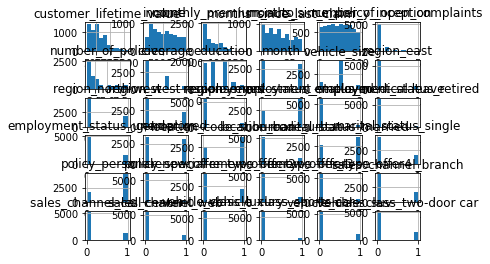

In [47]:
X_train.hist()

In [48]:
power=PowerTransformer().fit(X_train_scaled)   ##. finding the parameters ( mean, variance from the training set )

In [49]:
power= PowerTransformer()
power.fit(X_train_scaled)
X_train_trans = power.transform(X_train_scaled)
X_test_trans = power.transform(X_test_scaled)


In [50]:
# We should check is now looks normal distributed

<b> Apply linear regression

In [51]:
model=LinearRegression()    # model
model.fit(X_train_trans, y_train)   # model train

LinearRegression()

<b> model parameters  (b1,b2,b3,b4,b5,b6,b7)

In [52]:
model.coef_

array([ 2.24725247e+00, -3.41506326e+00,  7.57720066e+01,  2.43580413e-01,
       -4.47732233e-01, -1.87949110e+00, -2.05694871e+00,  4.37249259e+00,
       -3.63740361e+00, -4.58727279e-02, -3.53212755e+00,  4.25329549e+00,
       -1.71291122e+00,  1.70846850e-01, -5.57261453e+00, -1.78363441e+00,
        8.59863672e-01,  1.80584810e+00,  2.39677787e+01,  3.14000089e+00,
        1.73146468e+02,  8.13809796e+01, -1.42862552e-01,  1.91167234e+01,
       -1.33927160e-01,  1.55695989e+00,  3.11938457e+00,  1.50418016e+00,
        3.51053282e+00,  1.48084131e+00, -6.82404666e-03,  1.53639892e+00,
       -5.65276037e-01,  7.53763251e+00,  1.20999599e+01,  1.43600959e+00])

In [53]:
model.intercept_

381.60009347250343

<b> Making predictions

We make predictions (y_pred) using X_test_scaled

In [54]:
y_pred=model.predict(X_test_trans)   # model prediction

y_pred_train=model.predict(X_train_trans)

In [55]:
y_pred.shape

(2752,)

In [56]:
y_pred_train.shape

(6419,)

In [57]:
y.shape

(9171,)

### Model evaluation

In [58]:
y_test

8320     305.0
2773       7.0
4031      75.0
4696     117.0
10646     14.0
         ...  
10446    547.0
3867     806.0
9440     547.0
7136     246.0
9369     491.0
Name: total_claim_amount, Length: 2752, dtype: float64

In [59]:
y_pred.shape   #same shape as y_test

(2752,)

In [60]:
result=pd.DataFrame({"y_test":y_test,"y_pred":y_pred})
result

,y_test,y_pred
8320,305.0,248.138421
2773,7.0,128.182122
4031,75.0,266.470683
4696,117.0,185.765157
10646,14.0,20.033408
...,...,...
10446,547.0,566.793588
3867,806.0,663.840976
9440,547.0,587.181474
7136,246.0,217.226400


### Analizing the model. What kind of plot you will get if all the all the predictions are ok? A stright line

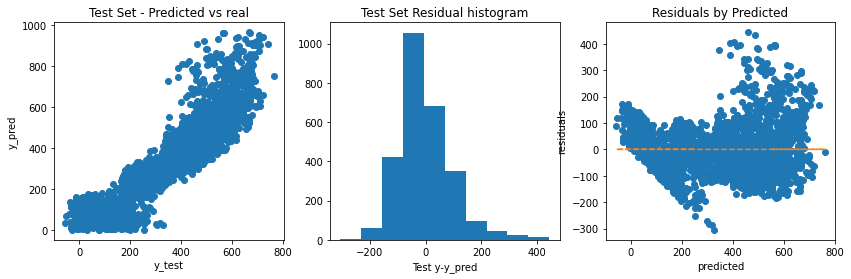

In [61]:
# Make an scatter plot y_pred vs y

fig, ax = plt.subplots(1,3,figsize=(14,4))
ax[0].plot(y_pred, y_test, 'o')
ax[0].set_xlabel("y_test")
ax[0].set_ylabel("y_pred")
ax[0].set_title("Test Set - Predicted vs real")

# Get a histogram of the residuals ie: y - y_pred.  Homoscdasticity
# It resembles a normal distribution?
ax[1].hist(y_test - y_pred)
ax[1].set_xlabel("Test y-y_pred")
ax[1].set_title("Test Set Residual histogram")

ax[2].plot(y_pred,y_test - y_pred,"o")
ax[2].set_xlabel("predicted")
ax[2].set_ylabel("residuals")
ax[2].set_title("Residuals by Predicted")
ax[2].plot(y_pred,np.zeros(len(y_pred)),linestyle='dashed')

In [62]:
# first plot: checking linearity
# second plot: checking normality of residuals. It is a normal distribution, and the majority of residuals are close to 0. good! 
# --> No over or under estimation
# third plot: checking homoscedasticity. Variance is less constant than in the previos model

<AxesSubplot:xlabel='y_pred', ylabel='y_test'>

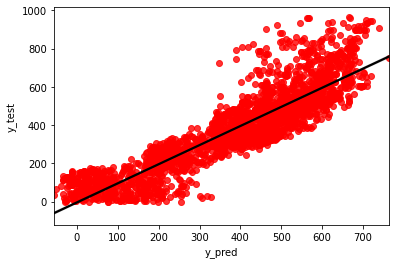

In [63]:
sns.regplot(x='y_pred',y='y_test', data=result, scatter_kws={"color": "red"}, line_kws={"color": "black"})

### Model evaluation

In [64]:
print ("MSE is " + str(mse(y_test,y_pred)))
print ("RMSE is " + str(mse(y_test,y_pred,squared=False)))
print ("Mean absolute error - MAE - is " + str(mae(y_test,y_pred)))

MSE is 9005.132158866683
RMSE is 94.89537480228783
Mean absolute error - MAE - is 73.07124876806793


- r2

In [65]:
R2 = r2_score(y_test,y_pred)
R2

0.7812902978336402

- Adjusted r2

In [66]:
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.778390279683368

### Evaluate error metrics also on train test

- If error_train very high -> Underfitting ( consider other model or to  add more variables)
- If error_train <= error_test -> Ok
- If error_train very small and <<<< error_test -> Overfitting!!!! ( you overtrained your model  or you did not applied the transformer to the test set ).


In [67]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)

In [68]:
round(R2_test,4), round(R2_train,4)  #OK

(0.784, 0.7831)

### Feature importance
- In order to check which independent features are more relevant to your model, compare the absolute value of each coefficient.

In [69]:
features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_)
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)

In [70]:
features_importances

,Attribute,Importance
20,location_code_suburban,173.146468
21,location_code_urban,81.380980
2,monthly_premium_auto,75.772007
18,employment_status_unemployed,23.967779
23,marital_status_single,19.116723
34,vehicle_class_suv,12.099960
33,vehicle_class_sports car,7.537633
14,response_yes,5.572615
7,coverage,4.372493
11,region_east,4.253295


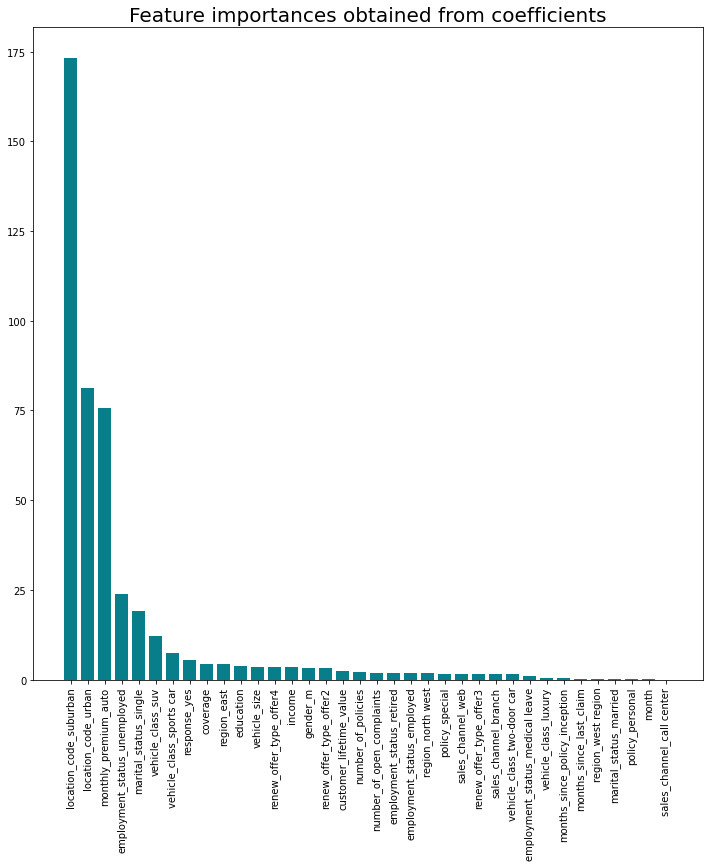

In [71]:
plt.figure(figsize=(12,12))
plt.bar(x=features_importances['Attribute'], height=features_importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

/home/dani/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'customer_lifetime_value'}>,
        <AxesSubplot:title={'center':'income'}>,
        <AxesSubplot:title={'center':'monthly_premium_auto'}>],
       [<AxesSubplot:title={'center':'months_since_last_claim'}>,
        <AxesSubplot:title={'center':'months_since_policy_inception'}>,
        <AxesSubplot:title={'center':'number_of_open_complaints'}>],
       [<AxesSubplot:title={'center':'number_of_policies'}>,
        <AxesSubplot:title={'center':'total_claim_amount'}>,
        <AxesSubplot:>]], dtype=object)

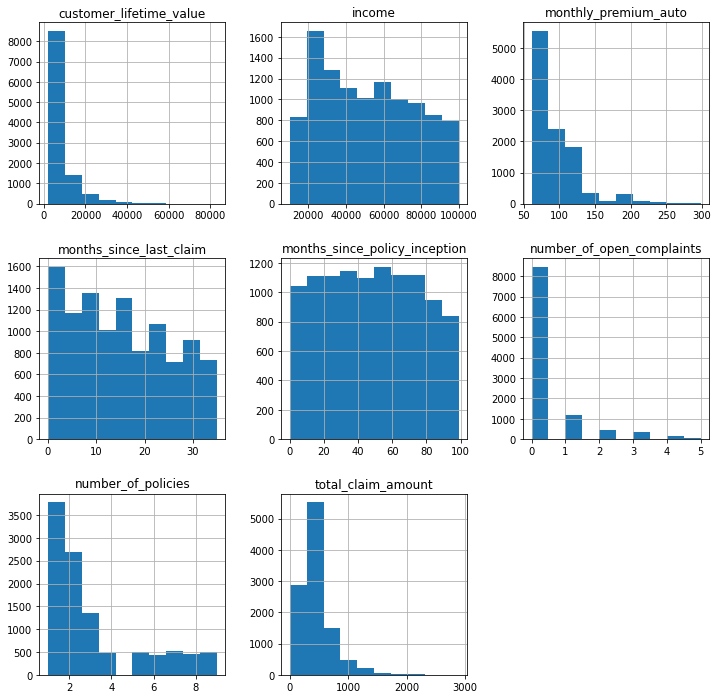

In [72]:
numerical.hist(figsize=(12,12))

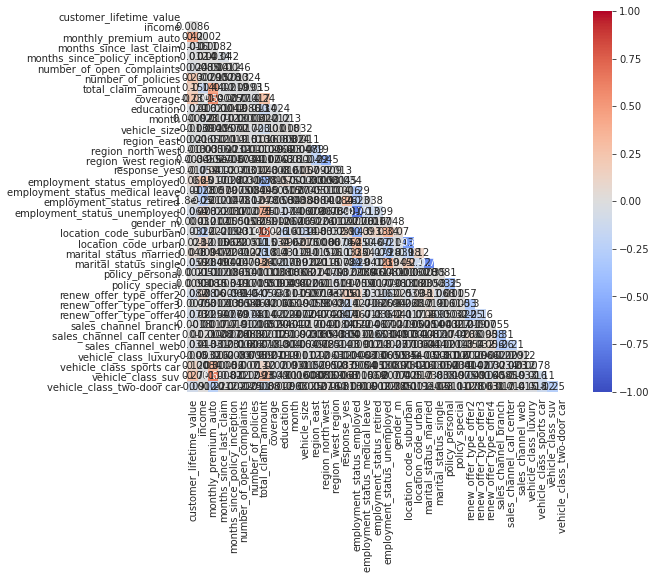

In [73]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [74]:
corr = df.corr()
corr

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,coverage,education,...,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_branch,sales_channel_call center,sales_channel_web,vehicle_class_luxury,vehicle_class_sports car,vehicle_class_suv,vehicle_class_two-door car
customer_lifetime_value,1.000000,0.008631,0.421024,-0.016327,-0.012386,-0.024259,0.226531,0.151703,0.234234,-0.021360,...,-0.081541,-0.007512,-0.073021,-0.001837,0.010071,-0.033613,-0.004963,0.122161,0.267000,-0.090280
income,0.008631,1.000000,-0.000196,-0.011455,0.013658,0.008473,-0.002897,-0.144381,-0.000836,0.016061,...,0.077662,0.003035,0.022440,-0.010299,0.020932,0.013443,-0.003225,-0.008427,-0.001131,0.011949
monthly_premium_auto,0.421024,-0.000196,1.000000,-0.008177,0.003415,-0.013921,-0.014662,0.440828,0.545661,-0.020730,...,-0.060422,-0.011591,-0.054456,0.016791,-0.002757,-0.031018,-0.015585,0.305364,0.620335,-0.221141
months_since_last_claim,-0.016327,-0.011455,-0.008177,1.000000,-0.041996,0.001189,0.002760,-0.020335,-0.002473,-0.000418,...,-0.000995,-0.013265,-0.007734,0.017122,0.002724,-0.023061,0.019619,0.000558,-0.008201,0.011678
months_since_policy_inception,-0.012386,0.013658,0.003415,-0.041996,1.000000,0.004564,-0.013270,-0.018909,0.007663,0.018745,...,-0.060855,0.005477,-0.068836,0.018597,-0.027848,-0.001624,-0.008891,0.020375,-0.012281,-0.002217
number_of_open_complaints,-0.024259,0.008473,-0.013921,0.001189,0.004564,1.000000,0.002385,-0.009266,-0.014268,0.008581,...,-0.046314,-0.008376,-0.007439,-0.012164,-0.008311,-0.008634,-0.007868,-0.006989,-0.012371,-0.002470
number_of_policies,0.226531,-0.002897,-0.014662,0.002760,-0.013270,0.002385,1.000000,-0.015107,-0.016635,-0.012741,...,-0.046811,0.006384,-0.080764,-0.015952,0.009185,0.008708,-0.005943,0.012568,-0.009273,-0.011268
total_claim_amount,0.151703,-0.144381,0.440828,-0.020335,-0.018909,-0.009266,-0.015107,1.000000,0.244071,-0.141997,...,-0.055598,-0.019800,-0.039955,0.005241,-0.000124,-0.018048,-0.002745,0.120520,0.281193,-0.087608
coverage,0.234234,-0.000836,0.545661,-0.002473,0.007663,-0.014268,-0.016635,0.244071,1.000000,-0.024376,...,-0.032993,0.000662,-0.022078,0.009410,-0.015035,-0.018347,-0.019499,-0.019515,-0.049484,-0.001171
education,-0.021360,0.016061,-0.020730,-0.000418,0.018745,0.008581,-0.012741,-0.141997,-0.024376,1.000000,...,-0.010198,0.013436,-0.023966,0.006375,0.010478,-0.004029,0.019431,-0.009281,-0.010199,0.009566


In [75]:
df.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'coverage', 'education', 'month', 'vehicle_size', 'region_east',
       'region_north west', 'region_west region', 'response_yes',
       'employment_status_employed', 'employment_status_medical leave',
       'employment_status_retired', 'employment_status_unemployed', 'gender_m',
       'location_code_suburban', 'location_code_urban',
       'marital_status_married', 'marital_status_single', 'policy_personal',
       'policy_special', 'renew_offer_type_offer2', 'renew_offer_type_offer3',
       'renew_offer_type_offer4', 'sales_channel_branch',
       'sales_channel_call center', 'sales_channel_web',
       'vehicle_class_luxury', 'vehicle_class_sports car', 'vehicle_class_suv',
       'vehicle_class_two-door car'],
      dtype='object')

In [76]:
categoricals.columns

Index(['coverage', 'education', 'month', 'vehicle_size', 'region_east',
       'region_north west', 'region_west region', 'response_yes',
       'employment_status_employed', 'employment_status_medical leave',
       'employment_status_retired', 'employment_status_unemployed', 'gender_m',
       'location_code_suburban', 'location_code_urban',
       'marital_status_married', 'marital_status_single', 'policy_personal',
       'policy_special', 'renew_offer_type_offer2', 'renew_offer_type_offer3',
       'renew_offer_type_offer4', 'sales_channel_branch',
       'sales_channel_call center', 'sales_channel_web',
       'vehicle_class_luxury', 'vehicle_class_sports car', 'vehicle_class_suv',
       'vehicle_class_two-door car'],
      dtype='object')